In [67]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('../datasets/AdventureWorks.xlsx')

In [68]:
df.sample(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
205,2008-05-27,2008-06-02,306,1226,19052,200805274CS576,330.99,999.0,12,0.0,11988.0,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [69]:
df["Custo total"] = df['Quantidade'].mul(df['Custo Unitário'])
df['Lucro'] = df["Valor Venda"] - df["Custo total"]

In [70]:
df["Tempo_envio"] = df["Data Envio"] - df['Data Venda']

In [71]:
#Venda de produtos por data e tipo
df.groupby(['Data Venda','Quantidade'])["Produto"].sum()

Data Venda  Quantidade
2008-01-02  8                 Fabrikam Trendsetter 2/3'' 17mm X100 Black
            12               Fabrikam Trendsetter 1/3'' 8.5mm X200 Black
2008-01-04  4                 Fabrikam Trendsetter 2/3'' 17mm X100 Black
            6                  Fabrikam Trendsetter 2/3'' 17mm X100 Grey
            8                Fabrikam Trendsetter 1/3'' 8.5mm X200 White
                                               ...                      
2009-12-29  7                      Adventure Works Laptop15.4W M1548 Red
            312           Headphone Adapter for Contoso Phone E130 White
2009-12-30  624           Headphone Adapter for Contoso Phone E130 White
2009-12-31  8                      Adventure Works Laptop15.4W M1548 Red
            1560          Headphone Adapter for Contoso Phone E130 White
Name: Produto, Length: 803, dtype: object

In [72]:
#Quantidade de produtos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

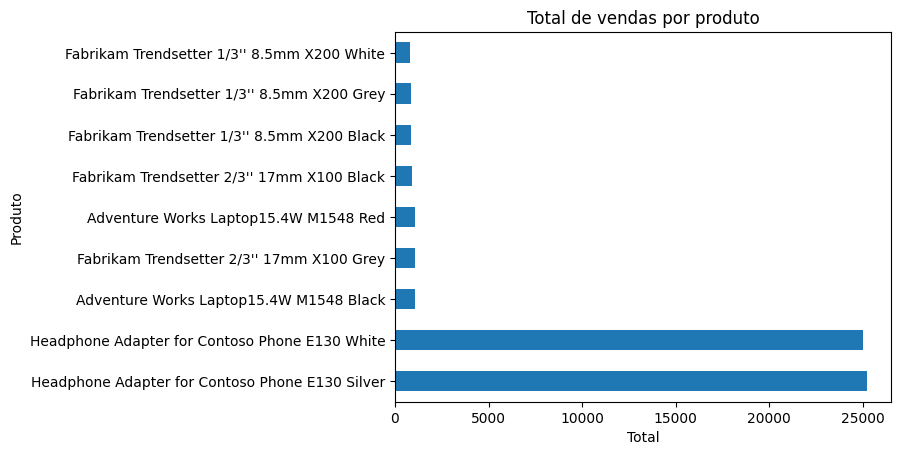

In [73]:
#grafico quantidade de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh(title="Total de vendas por produto")
plt.xlabel("Total")
plt.ylabel('Produto')

Text(0, 0.5, 'Lucro')

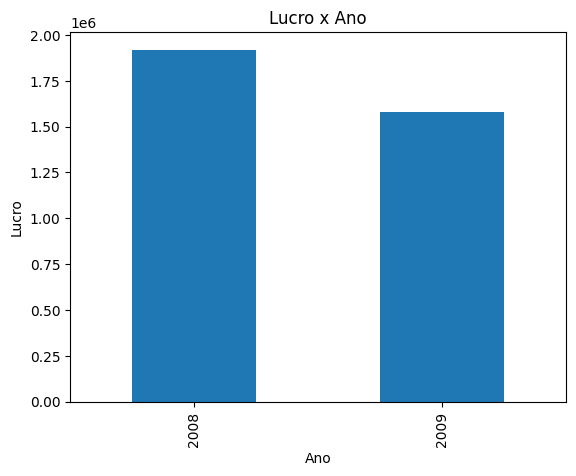

In [74]:
df.groupby(df["Data Venda"].dt.year)['Lucro'].sum().plot.bar(title="Lucro x Ano")
plt.xlabel('Ano')
plt.ylabel('Lucro')

In [75]:
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [76]:
df_2009.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo total,Lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12 days


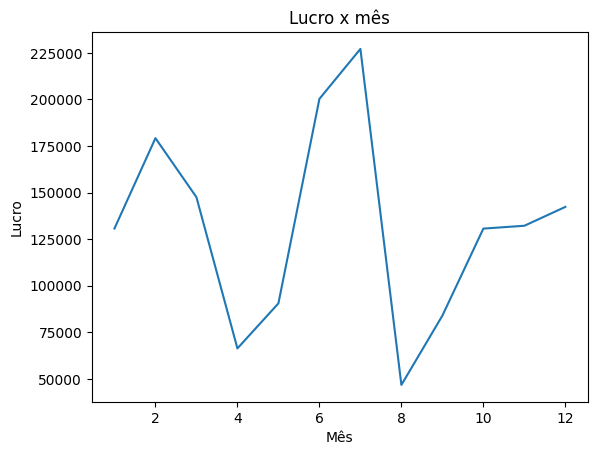

In [80]:
df_2009.groupby(df['Data Venda'].dt.month)["Lucro"].sum().plot(title="Lucro x mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

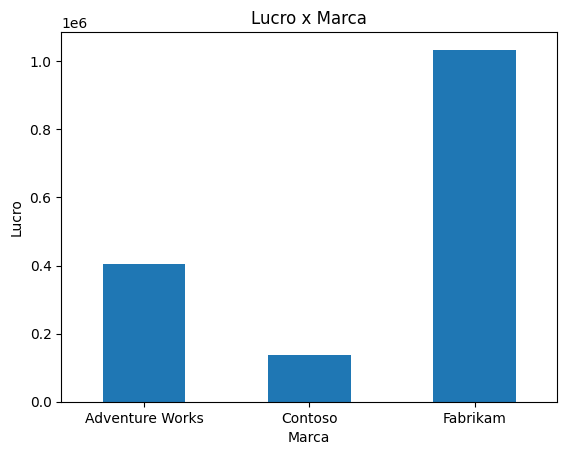

In [83]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title="Lucro x Marca")
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation="horizontal")


(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

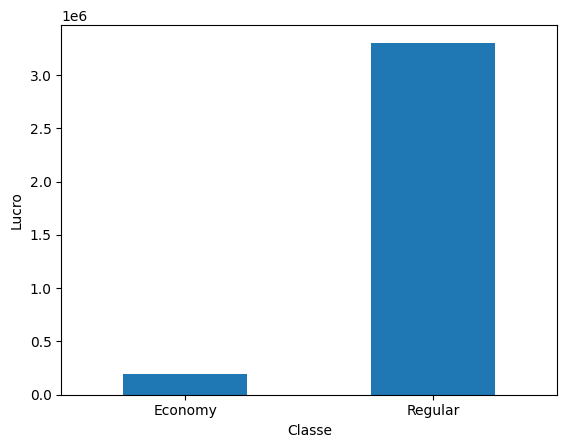

In [85]:
df_2009 = df.groupby("Classe")["Lucro"].sum().plot.bar("Classe x Lucro")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

In [87]:
df['Tempo_envio'].describe()

count                          904
mean     8 days 13:02:07.433628318
std      3 days 01:21:57.877052211
min                4 days 00:00:00
25%                6 days 00:00:00
50%                9 days 00:00:00
75%               11 days 00:00:00
max               20 days 00:00:00
Name: Tempo_envio, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x1fdc9b5bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fdc9b7c460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fdc9b5bc40>],
 'medians': [<matplotlib.lines.Line2D at 0x1fdc9b7c9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fdc9b7cc40>],
 'means': []}

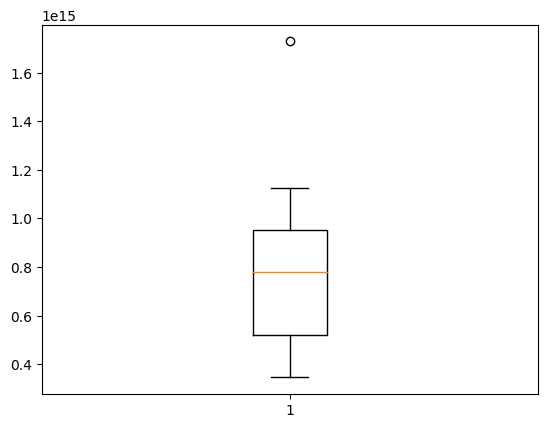

In [99]:
plt.boxplot(df["Tempo_envio"])